# Todo 5
Christopher Lagunilla  
Due Tuesday, September 19

## Installing and Using Pandas
- requires NumPy to be installed
- "pd" is the conventional abbreviation

In [1]:
# importing pandas
import pandas as pd
import numpy

# check version
pd.__version__

'0.20.3'

## Pandas Objects
### Series: a one-dimensional array of indexed data
    - can be created from a list or array
    - wraps both a sequence of values and a sequence of indices
        - values and indices are accessible
        - values are returned as a NumPy array
    

In [2]:
data = pd.Series([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
data

0    0.0
1    0.5
2    1.0
3    1.5
4    2.0
5    2.5
6    3.0
dtype: float64

In [3]:
print(data.values)
print(data.index)

[ 0.   0.5  1.   1.5  2.   2.5  3. ]
RangeIndex(start=0, stop=7, step=1)


#### Series as Generalized NumPy Array
- Series is interchangable with a 1D NumPy array
    - difference is presence of the index attribute
    - implicit vs. explicit indices
- Series indices can be any type, not just integers

In [4]:
data = pd.Series([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], index=['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh'])
data

first      0.0
second     0.5
third      1.0
fourth     1.5
fifth      2.0
sixth      2.5
seventh    3.0
dtype: float64

#### Series as Specialized Dictionary
- Python Dictionary: maps arbitrary keys to arbitrary values
- Pandas Series: maps typed keys to typed values
- dictionaries can be used to create a Series

In [5]:
dict = {'one':1, 'two':2, 'three':3}
series = pd.Series(dict)
series

one      1
three    3
two      2
dtype: int64

- Series will be created with sorted keys become the indices

#### Constructing Series Objects
- Ways to Construct:
    1. use Series Constructor
    2. use list as parameter
    3. use dictionary as parameter

### The Pandas DataFrame Object
#### DataFrame As A Generalized NumPy Array
- 2D array with flexible row indices and flexible column names
- in a chart, indices are the row headers and values are column headers

In [6]:
pdict = {'one':1, 'two':2, 'three':3}
letters = {'one':'A', 'two':'B', 'three':'C'}
dict_series = pd.Series(pdict)
letters_series = pd.Series(letters)

new_series = pd.DataFrame({'col1':dict_series, 'col2':letters_series})
new_series

,col1,col2
one,1,A
three,3,C
two,2,B


#### DataFrame as Specialized Dictionary
- DataFrame maps a column name to a Series of column data

#### Constructing DataFrame Objects
1. From a single Series object
2. From a list of dictionaries
3. From a dictionary of Series objects
4. From a 2D NumPy array
5. From a NumPy structured array

### The Pandas Index Object
- an immutable array that allows a user to reference data

#### Index as Immutable Array
- the Index object can use standard Python indexing
- similar attributes to NumPy arrays
- Index object cannot use normal means to modify array elements

#### Index As Ordered Set
- follows the conventions of Python's Set data structure

## Data Indexing and Selection
- Data can be accessed using dictionary notation, 1D array notation

#### Indexers: loc, iloc, and ix
- loc: function to expose explicit index
- iloc: allows for indexing using normal Python convention
- ix: hybrid of loc and iloc

## Operating on Data in Pandas
### Ufuncs: Index Preservation
- NumPy ufuncs word on Padas Series and DataFrame objects
- applying a ufunc __preserves__ indices

### Ufuncs: Index Alignment
#### Index Alignment in Series
- non entries are marked with NaN to maintain alignment

#### Index Alignment in DataFrame
- in DataFrames, NaN is used in both cells regardless of the order of the two objects

### Ufuncs: Operations Between DataFrame and Series
- row-wise operations


In [7]:
import csv
zip_codes = pd.read_csv('zipcodes_chris.csv', names=['ZIP', 'City', 'County'])

zip_codes.values

array([['ZIP', 'City', 'County'],
       ['15001', 'Aliquippa', 'Beaver'],
       ['15003', 'Ambridge', 'Beaver'],
       ..., 
       ['19611', 'Reading', 'Berks'],
       ['19612', 'Reading', 'Berks'],
       ['19640', 'Reading', 'Berks']], dtype=object)

In [8]:
zip_codes.T

,0,1,2,3,4,5,6,7,8,9,...,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205
ZIP,ZIP,15001,15003,15004,15005,15006,15007,15009,15010,15012,...,19604,19605,19606,19607,19608,19609,19610,19611,19612,19640
City,City,Aliquippa,Ambridge,Atlasburg,Baden,Bairdford,Bakerstown,Beaver,Beaver Falls,Belle Vernon,...,Reading,Reading,Reading,Reading,Reading,Reading,Reading,Reading,Reading,Reading
County,County,Beaver,Beaver,Washington,Beaver,Allegheny,Allegheny,Beaver,Beaver,Fayette,...,Berks,Berks,Berks,Berks,Berks,Berks,Berks,Berks,Berks,Berks


In [9]:
zip_codes.describe

<bound method NDFrame.describe of         ZIP              City      County
0       ZIP              City      County
1     15001         Aliquippa      Beaver
2     15003          Ambridge      Beaver
3     15004         Atlasburg  Washington
4     15005             Baden      Beaver
5     15006         Bairdford   Allegheny
6     15007        Bakerstown   Allegheny
7     15009            Beaver      Beaver
8     15010      Beaver Falls      Beaver
9     15012      Belle Vernon     Fayette
10    15014      Brackenridge   Allegheny
11    15015     Bradfordwoods   Allegheny
12    15017       Bridgeville   Allegheny
13    15018       Buena Vista   Allegheny
14    15019            Bulger  Washington
15    15020            Bunola   Allegheny
16    15021      Burgettstown  Washington
17    15022         Charleroi  Washington
18    15024          Cheswick   Allegheny
19    15025          Clairton   Allegheny
20    15026           Clinton      Beaver
21    15027            Conway      Beaver


In [10]:
# concatenate two columns across the DataFrame
zip_codes['ZIP/City'] = zip_codes['ZIP'] + ": " + zip_codes['County']
zip_codes[:20]

,ZIP,City,County,ZIP/City
0,ZIP,City,County,ZIP: County
1,15001,Aliquippa,Beaver,15001: Beaver
2,15003,Ambridge,Beaver,15003: Beaver
3,15004,Atlasburg,Washington,15004: Washington
4,15005,Baden,Beaver,15005: Beaver
5,15006,Bairdford,Allegheny,15006: Allegheny
6,15007,Bakerstown,Allegheny,15007: Allegheny
7,15009,Beaver,Beaver,15009: Beaver
8,15010,Beaver Falls,Beaver,15010: Beaver
9,15012,Belle Vernon,Fayette,15012: Fayette


In [11]:
# reset Indexes to be the ZIP codes
zip_codes = zip_codes[1:].set_index('ZIP')
zip_codes

,City,County,ZIP/City
ZIP,,,
15001,Aliquippa,Beaver,15001: Beaver
15003,Ambridge,Beaver,15003: Beaver
15004,Atlasburg,Washington,15004: Washington
15005,Baden,Beaver,15005: Beaver
15006,Bairdford,Allegheny,15006: Allegheny
15007,Bakerstown,Allegheny,15007: Allegheny
15009,Beaver,Beaver,15009: Beaver
15010,Beaver Falls,Beaver,15010: Beaver
15012,Belle Vernon,Fayette,15012: Fayette


In [12]:
# drop a column
zip_codes = zip_codes.drop('ZIP/City', axis=1)
zip_codes

,City,County
ZIP,,
15001,Aliquippa,Beaver
15003,Ambridge,Beaver
15004,Atlasburg,Washington
15005,Baden,Beaver
15006,Bairdford,Allegheny
15007,Bakerstown,Allegheny
15009,Beaver,Beaver
15010,Beaver Falls,Beaver
15012,Belle Vernon,Fayette


In [13]:
# return a new dataframe of zip codes in allegheny county
allegheny = zip_codes[zip_codes['County'] == 'Allegheny']
allegheny

,City,County
ZIP,,
15006,Bairdford,Allegheny
15007,Bakerstown,Allegheny
15014,Brackenridge,Allegheny
15015,Bradfordwoods,Allegheny
15017,Bridgeville,Allegheny
15018,Buena Vista,Allegheny
15020,Bunola,Allegheny
15024,Cheswick,Allegheny
15025,Clairton,Allegheny


In [14]:
pittsburgh = zip_codes[zip_codes['City'] == 'Pittsburgh']
len(pittsburgh)

77

In [15]:
pittsburgh[:10]

,City,County
ZIP,,
15201,Pittsburgh,Allegheny
15202,Pittsburgh,Allegheny
15203,Pittsburgh,Allegheny
15204,Pittsburgh,Allegheny
15205,Pittsburgh,Allegheny
15206,Pittsburgh,Allegheny
15207,Pittsburgh,Allegheny
15208,Pittsburgh,Allegheny
15209,Pittsburgh,Allegheny


# Other Practice
Using Other Data

In [27]:
df = pd.read_csv('placestoeat_haring.csv')

,Place,Neighborhood,Price
0,Girasole,Shadyside,$$
1,Smallman Galley,The Strip,$$
2,Pastolis,Squirrel Hill,$
3,Gaucho,The Strip,$$
4,Spice Island Tea House,South Oakland,$
5,Fatheads,South Side,$
6,Pamela's,Oakland,$
7,Noodlehead,East Liberty,$
8,SMOKE,Lawrenceville,$$
9,The Yard,Shadyside,$$


In [32]:
# sort by price
df.sort_values('Price')

# get restauraunts in the strip
strip_restauraunts = df[df['Neighborhood'] == 'The Strip']
strip_restauraunts

strip_restauraunts.sort_values('Price')

,Place,Neighborhood,Price
12,Chicken Latino,The Strip,$
1,Smallman Galley,The Strip,$$
3,Gaucho,The Strip,$$


In [34]:
# write a function to apply to the whole dataframe
def addPgh(city):
    return city + ", Pgh"

# not sure how this works yet?
df.apply(addPgh, axis=1)
df

,Place,Neighborhood,Price
0,Girasole,Shadyside,$$
1,Smallman Galley,The Strip,$$
2,Pastolis,Squirrel Hill,$
3,Gaucho,The Strip,$$
4,Spice Island Tea House,South Oakland,$
5,Fatheads,South Side,$
6,Pamela's,Oakland,$
7,Noodlehead,East Liberty,$
8,SMOKE,Lawrenceville,$$
9,The Yard,Shadyside,$$


# Visualization Practice
Added As Part of To Do 5

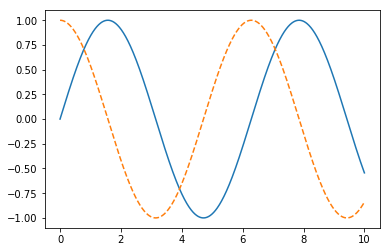

In [18]:
# trying example from book
import matplotlib.pyplot as plt
import numpy as np

# creates interactive plot

# linspace(start, end, increment)
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
plt.show()

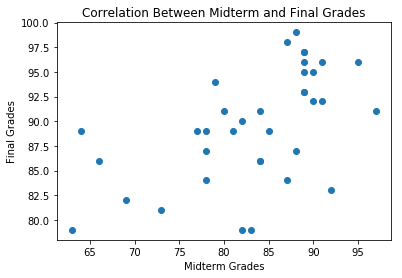

In [19]:
df = pd.read_csv('asl-background-cut_margaret.csv')

plt.scatter(df['MIDTERM'], df['FINAL'])
plt.xlabel('Midterm Grades')
plt.ylabel('Final Grades')
plt.title('Correlation Between Midterm and Final Grades')
plt.show()

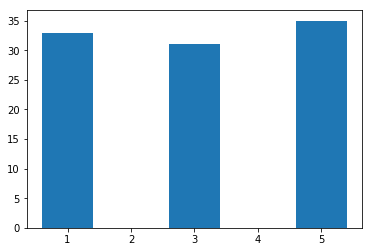

In [25]:
# not sure why this isnt binning correctly
plt.bar(df['LEVEL'], range(len(df['LEVEL'])))
plt.show()